In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

#Read Data
train_import = pd.read_csv("/Users/grazim/Documents/Kaggle_Local/Shelter Animal Outcomes/train.csv")
test_import = pd.read_csv("/Users/grazim/Documents/Kaggle_Local/Shelter Animal Outcomes/test.csv")

In [2]:
train_import.dtypes

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [3]:
train_import.head(3)

AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  2014-02-12 18:22:00  Return_to_owner            NaN   
1  A656520    Emily  2013-10-13 12:44:00       Euthanasia      Suffering   
2  A686464   Pearce  2015-01-31 12:28:00         Adoption         Foster   

  AnimalType SexuponOutcome AgeuponOutcome                   Breed  \
0        Dog  Neutered Male         1 year   Shetland Sheepdog Mix   
1        Cat  Spayed Female         1 year  Domestic Shorthair Mix   
2        Dog  Neutered Male        2 years            Pit Bull Mix   

         Color  
0  Brown/White  
1  Cream Tabby  
2   Blue/White

Intial Questions:

1. Does time have impact on outcome? Day of week, time of day, etc.
2. Color of animal?  Does the presense of certain colors have impact on outcome?  Create a series of dummy variables for each of the colors to test individual outcome
3. Is there a difference in outcome frequency for Dogs vs. Cats?
4. Create a seperate column for Sex
5. Create a seperate column for spayed/neutered


In [4]:
test_import.head()

ID      Name             DateTime AnimalType SexuponOutcome AgeuponOutcome  \
0   1    Summer  2015-10-12 12:15:00        Dog  Intact Female      10 months   
1   2  Cheyenne  2014-07-26 17:59:00        Dog  Spayed Female        2 years   
2   3       Gus  2016-01-13 12:20:00        Cat  Neutered Male         1 year   
3   4     Pongo  2013-12-28 18:12:00        Dog    Intact Male       4 months   
4   5   Skooter  2015-09-24 17:59:00        Dog  Neutered Male        2 years   

                            Breed        Color  
0          Labrador Retriever Mix    Red/White  
1  German Shepherd/Siberian Husky    Black/Tan  
2          Domestic Shorthair Mix  Brown Tabby  
3               Collie Smooth Mix     Tricolor  
4            Miniature Poodle Mix        White

In [5]:
#Summary Statistics
train_import.describe()

AnimalID   Name             DateTime OutcomeType OutcomeSubtype  \
count     26729  19038                26729       26729          13117   
unique    26729   6374                22918           5             16   
top     A704265    Max  2015-08-11 00:00:00    Adoption        Partner   
freq          1    136                   19       10769           7816   

       AnimalType SexuponOutcome AgeuponOutcome                   Breed  \
count       26729          26728          26711                   26729   
unique          2              5             44                    1380   
top           Dog  Neutered Male         1 year  Domestic Shorthair Mix   
freq        15595           9779           3969                    8810   

              Color  
count         26729  
unique          366  
top     Black/White  
freq           2824

In [6]:
#Check for missing Data
train_import.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

# Fixed (Spayed/Neutered)

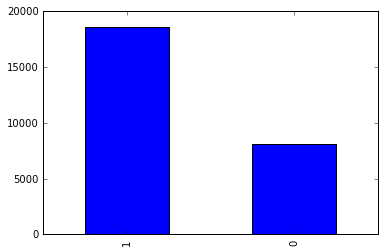

In [7]:
fixed_sex = train_import['SexuponOutcome'].str.split(' ')

#If spayed or neutered, make fixed 1, else false
train_import['fixed'] = [1 if x in ['Neutered', 'Spayed'] else 0 for x in fixed_sex.str[0]]

train_import.fixed.value_counts().plot(kind='bar')

Most animals are spayed or neutered (1 = fixed, 0 = not fixed)

#### Count

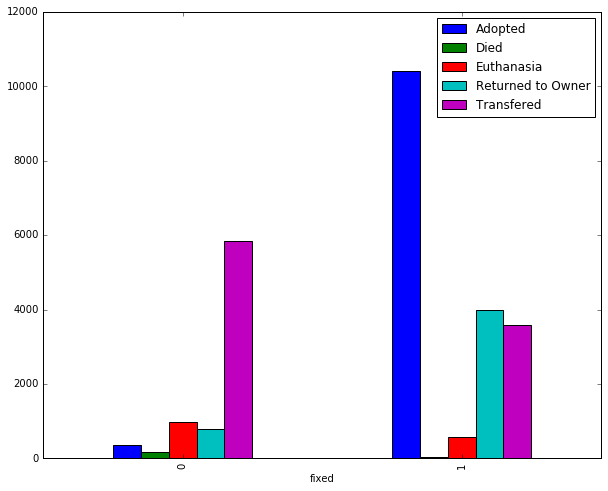

In [8]:
train_import[['fixed','OutcomeType', 'AnimalID']].groupby(['OutcomeType', 'fixed']).count().unstack('OutcomeType') \
            .plot(kind = 'bar', figsize = (10,8)).legend(labels =['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'])

#### Percent of Total (By Fixed)

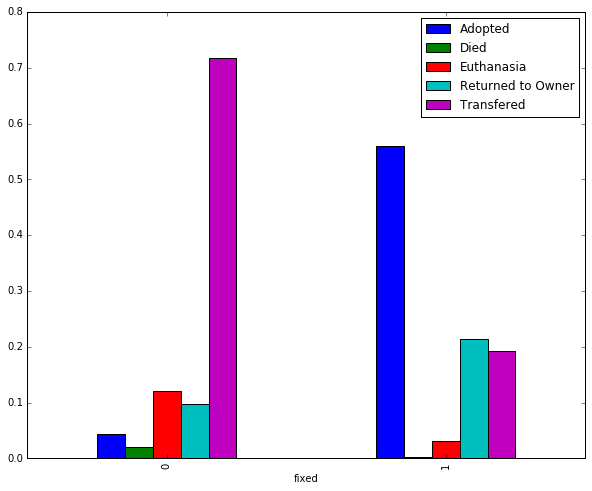

In [9]:
fixed = train_import[['fixed','OutcomeType', 'AnimalID']].groupby(['OutcomeType', 'fixed']).count().unstack('OutcomeType')
tot_obs_fixed= train_import[['AnimalID','fixed']].groupby('fixed').count()
tot_fixed_types = [tot_obs_fixed.AnimalID[0],tot_obs_fixed.AnimalID[1]]
fixed.div(tot_fixed_types, axis = 0).plot(kind='bar',figsize = (10,8)) \
.legend(labels =['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'])

Not surprisingly, animals that are fixed tend to be adopted at much higher rates than those that are not.

# Sex

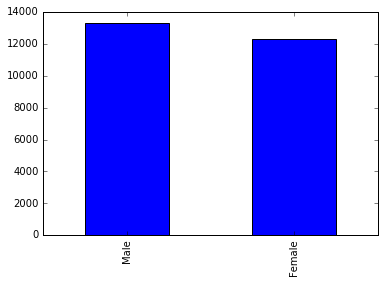

In [10]:
#Establish sex
train_import['sex'] = fixed_sex.str[1]
train_import.sex.value_counts().plot(kind='bar', stacked=True)

There is a fairly even spread of males and/or females

#### Count of outcome by sex

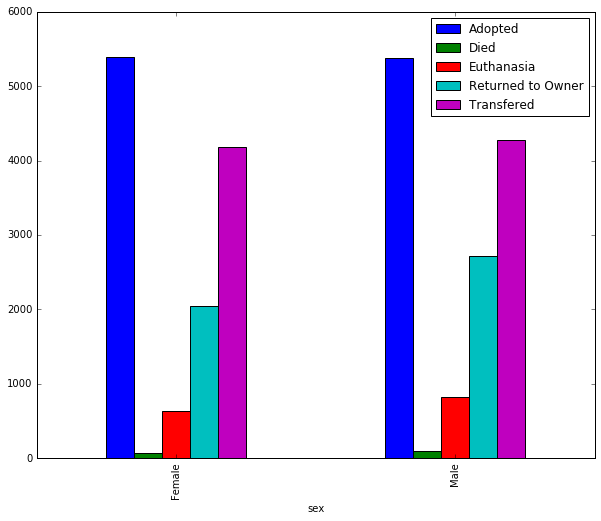

In [11]:
train_import[['sex','OutcomeType', 'AnimalID']].groupby(['OutcomeType', 'sex']).count().unstack('OutcomeType') \
            .plot(kind = 'bar', figsize = (10,8)).legend(labels =['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'])

The outcome of each animal type.  Far more dogs are returned to owners than are Cats.  Dogs tend to be adopted more. 

Lets look at rates for each of these to get a better picture

#### Percent of total (by Sex)

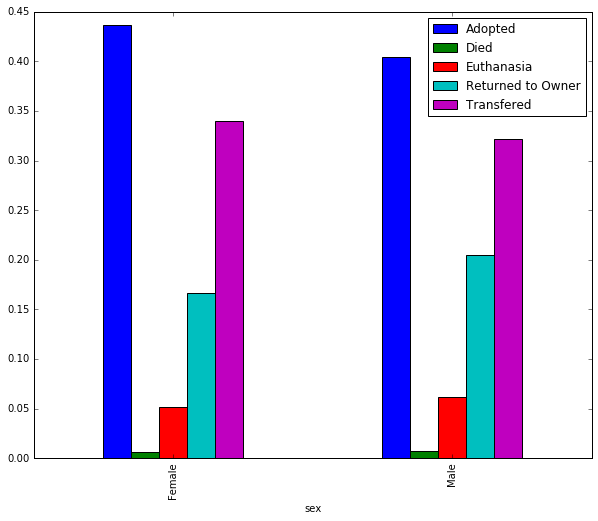

In [12]:
animal_type = train_import[['sex','OutcomeType', 'AnimalID']].groupby(['OutcomeType', 'sex']).count().unstack('OutcomeType')
tot_obs_AnimalType= train_import[['AnimalID','sex']].groupby('sex').count()
tot_an_types = [tot_obs_AnimalType.AnimalID[0],tot_obs_AnimalType.AnimalID[1]]
animal_type.div(tot_an_types, axis = 0).plot(kind='bar',figsize = (10,8)) \
.legend(labels =['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'])

# ANIMAL TYPE#

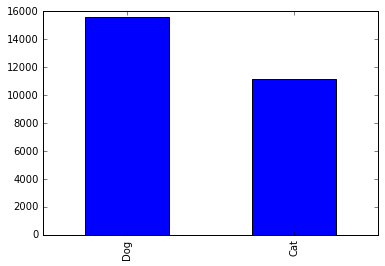

In [13]:
train_import.AnimalType.value_counts().plot(kind='bar')

Our dataset contains more dogs than cats

#### Count of outcome by Animal Type####

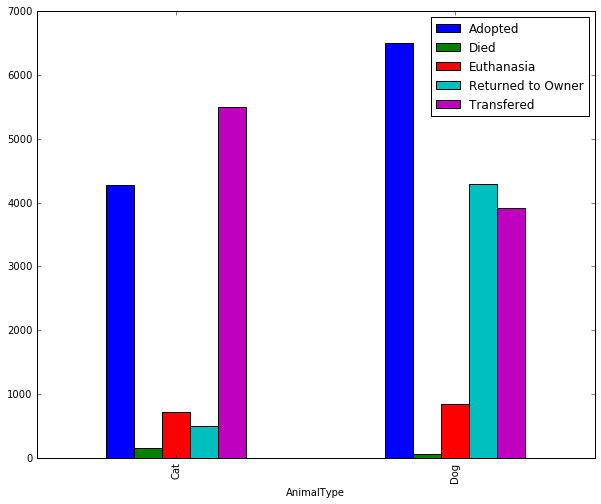

In [14]:
train_import[['AnimalType','OutcomeType', 'AnimalID']].groupby(['OutcomeType', 'AnimalType']).count().unstack('OutcomeType') \
            .plot(kind = 'bar', figsize = (10,8)) \
            .legend(labels =['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'])

#### Percent of total (By animal type)

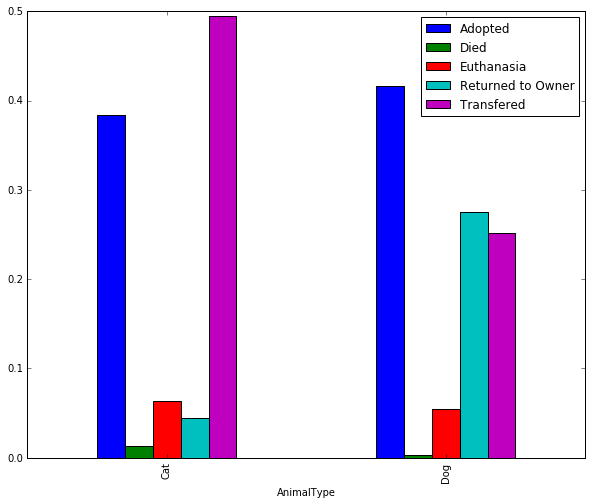

In [15]:
animal_type = train_import[['AnimalType','OutcomeType', 'AnimalID']].groupby(['OutcomeType', 'AnimalType']).count().unstack('OutcomeType')
tot_obs_AnimalType= train_import[['AnimalID','AnimalType']].groupby('AnimalType').count()
tot_an_types = [tot_obs_AnimalType.AnimalID[0],tot_obs_AnimalType.AnimalID[1]]
animal_type.div(tot_an_types, axis = 0).plot(kind='bar',figsize = (10,8)) \
.legend(labels =['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'])

Most cats are either transfered or adopted while most dogs are either adopted, returned to their owners, or transfered

# Age

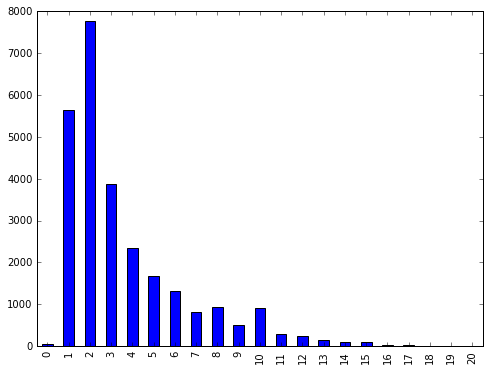

In [16]:
#Convert the age column into a standardized, usable format- Years
#Note: There are 18 NANs that will need to be handled.  Default these values to 0 for now. Address later in analysis
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year'): 
        return age 
    elif x.find('month'): 
        return age / 12
    elif x.find('week'): 
        return age / 52
    elif x.find('days'): 
        return age / 365
    else: 
        return 0
    
#NOTE: All credit for this function goes to Kaggle user Eugenia Uchaeva!

train_import['age_years'] = train_import.AgeuponOutcome.apply(calc_age_in_years)
train_import['age_years'] = pd.to_numeric(train_import['age_years'])
train_import.age_years.value_counts().sort_index().plot(kind = 'bar', figsize = (8,6))


The age of the animals skews on the younger side

#### Percent of each outcome by age

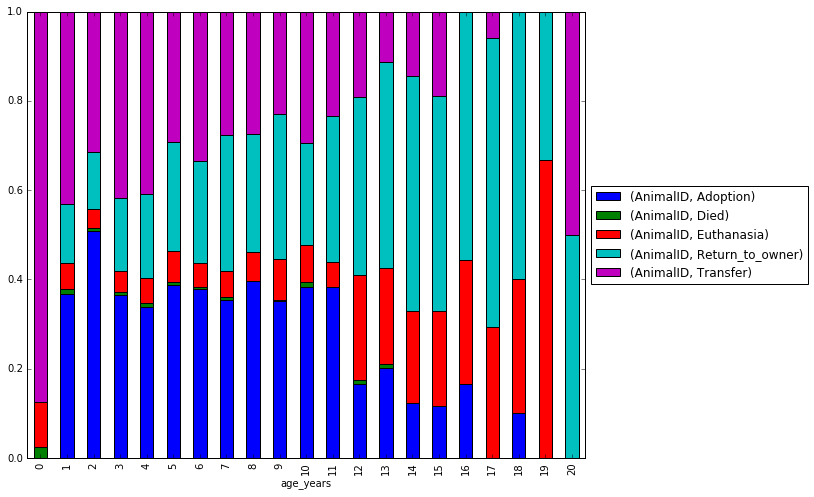

In [17]:
age = train_import[['age_years','OutcomeType', 'AnimalID']].groupby(['OutcomeType', 'age_years']).count().unstack('OutcomeType')
age= age.fillna(0)
tot_obs_age = train_import[['AnimalID','age_years']].groupby('age_years').count()
tot_obs = list(tot_obs_age.AnimalID)
age.div(tot_obs, axis = 0).plot(kind='bar',figsize = (10,8),stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Adoption rates are not as substantially different until you go beyond 11 years old.

NOTE: May be appropriate to create age groups in lieu of looking at each individual age

# Time of adoption

In [18]:
#Convert DateTime to day of week, time of day
train_import['DateTime'] = pd.to_datetime(train_import.DateTime)
train_import['year'] = train_import['DateTime'].dt.year
train_import['month'] = train_import['DateTime'].dt.month
train_import['dayofweek'] = train_import['DateTime'].dt.dayofweek # Monday = 0, Sunday = 6
train_import['hour'] = train_import['DateTime'].dt.hour
train_import['weekofyear'] = train_import['DateTime'].dt.weekofyear

#Convert to catagorical variables
train_import['year'] = train_import.year.astype(str)
#train_import['month'] = train_import.month.astype(str)
train_import['dayofweek'] = train_import.dayofweek.astype(str)
train_import['hour'] = train_import.hour.astype(str)
#train_import['weekofyear'] = train_import.weekofyear.astype(str)

In [19]:
train_import.year.value_counts().sort_index()

2013     2702
2014    11179
2015    11481
2016     1367
Name: year, dtype: int64

#### Day of week

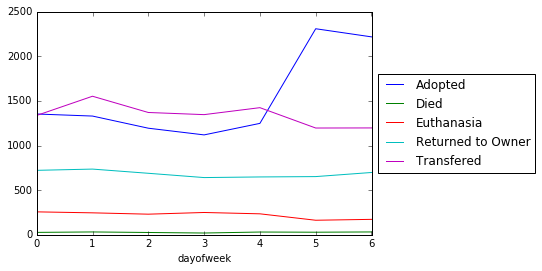

In [20]:
train_import[['dayofweek', 'OutcomeType', 'AnimalID']].groupby(['dayofweek', 'OutcomeType']) \
.count().unstack('OutcomeType').plot(kind = 'line') \
.legend(labels =['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'], loc='center left',bbox_to_anchor=(1, 0.5))

It appears aniimals are adopted much more on Fridays and Saturdays

#### Month of Year

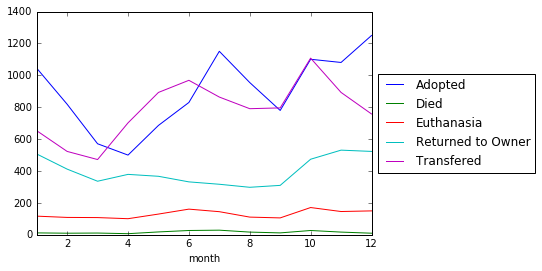

In [21]:
train_import[['month', 'OutcomeType', 'AnimalID']].groupby(['month', 'OutcomeType']) \
.count().unstack('OutcomeType').sort_index().plot(kind = 'line') \
.legend(labels =['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'],loc = 'center left', bbox_to_anchor=(1,.5))

There appears to be a large dip in both adoptions and transfers in March to April.

#### Week of year

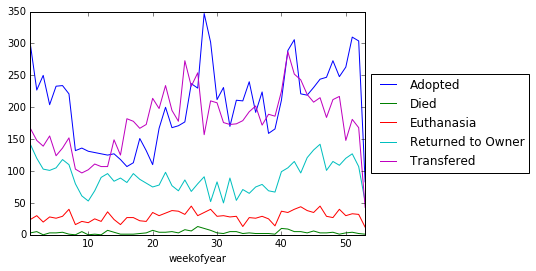

In [22]:
train_import[['weekofyear', 'OutcomeType', 'AnimalID']].groupby(['weekofyear', 'OutcomeType']) \
.count().unstack('OutcomeType').fillna(0).sort_index().plot(kind = 'line').legend(labels \
=['Adopted', 'Died', 'Euthanasia', 'Returned to Owner', 'Transfered'],loc='center left',bbox_to_anchor=(1, 0.5))

# Mixed breeds (muts) vs pure breeds

Distinguish between Pure breeds, partially known mixes (denoted by "Mix"), and know mix type (all tpyes listed, seperated by "/")

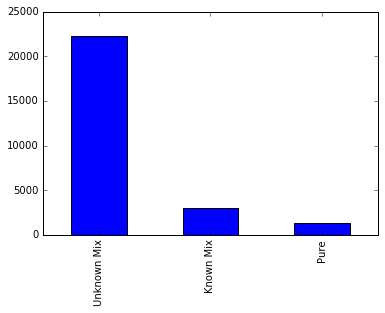

In [23]:
def Breed_Type(x):
    x = str(x)
    if x.find('Mix') >= 0:
        return 'Unknown Mix'
    elif x.find('/') >= 0:
        return 'Known Mix'
    else:
        return 'Pure'

Mix = train_import['breed_category'] = train_import.Breed.apply(Breed_Type)
train_import.breed_category.value_counts().plot(kind = 'bar')

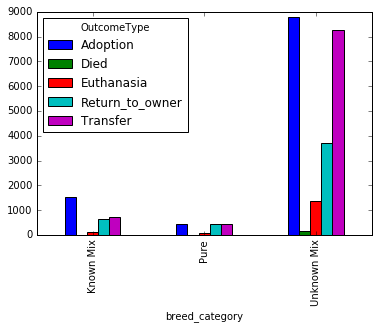

In [24]:
train_import.groupby(['OutcomeType', 'breed_category']).size().unstack('OutcomeType').plot(kind = 'bar')